In [2]:
import warnings

warnings.filterwarnings("ignore")

## Временные ряды

In [1]:
import pandas as pd

C:\Users\mi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\mi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


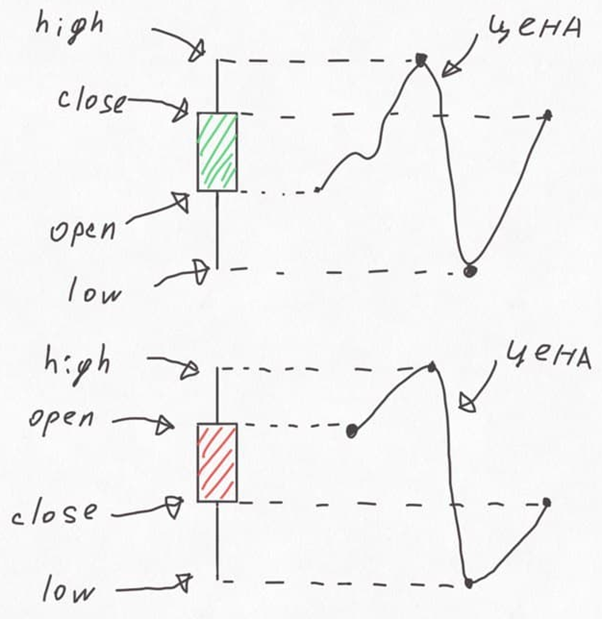

In [6]:
data = pd.read_parquet("TSLA.parquet")
data

,stock,time,c,h,l,o,v
0,TSLA,2021-06-07 07:00:00,596.34,597.88,593.14,596.13,851
1,TSLA,2021-06-07 07:01:00,597.00,597.89,596.35,597.87,96
2,TSLA,2021-06-07 07:02:00,596.89,597.56,596.50,597.42,68
3,TSLA,2021-06-07 07:03:00,595.87,596.70,594.24,596.35,216
4,TSLA,2021-06-07 07:04:00,595.27,596.00,594.34,595.88,99
...,...,...,...,...,...,...,...
40398,TSLA,2021-07-24 01:36:00,643.80,643.80,643.80,643.80,19
40399,TSLA,2021-07-24 01:37:00,643.80,643.80,643.80,643.80,73
40400,TSLA,2021-07-24 01:39:00,643.80,643.80,643.80,643.80,6
40401,TSLA,2021-07-24 01:40:00,643.75,643.80,643.75,643.80,51


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40403 entries, 0 to 40402
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stock   40403 non-null  object 
 1   time    40403 non-null  object 
 2   c       40403 non-null  float64
 3   h       40403 non-null  float64
 4   l       40403 non-null  float64
 5   o       40403 non-null  float64
 6   v       40403 non-null  int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 2.0+ MB


Предобработка данных

In [8]:
data = data.drop(["stock", "v"], axis=1)
data

,time,c,h,l,o
0,2021-06-07 07:00:00,596.34,597.88,593.14,596.13
1,2021-06-07 07:01:00,597.00,597.89,596.35,597.87
2,2021-06-07 07:02:00,596.89,597.56,596.50,597.42
3,2021-06-07 07:03:00,595.87,596.70,594.24,596.35
4,2021-06-07 07:04:00,595.27,596.00,594.34,595.88
...,...,...,...,...,...
40398,2021-07-24 01:36:00,643.80,643.80,643.80,643.80
40399,2021-07-24 01:37:00,643.80,643.80,643.80,643.80
40400,2021-07-24 01:39:00,643.80,643.80,643.80,643.80
40401,2021-07-24 01:40:00,643.75,643.80,643.75,643.80


In [9]:
data["time"] = pd.to_datetime(data["time"], format="%Y-%m-%d %H:%M:%S")

%Y - год  
%m - месяц  
%d - день  
%H - часы  
%M - минуты  
%S - секунды  

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40403 entries, 0 to 40402
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    40403 non-null  datetime64[ns]
 1   c       40403 non-null  float64       
 2   h       40403 non-null  float64       
 3   l       40403 non-null  float64       
 4   o       40403 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.5 MB


Для определения даты начала и конца можно при помощи функций min() и max()

In [11]:
(data["time"].min(), data["time"].max())

(Timestamp('2021-06-07 07:00:00'), Timestamp('2021-07-24 01:42:00'))

In [12]:
data["year"] = data["time"].dt.year
data["month"] = data["time"].dt.month
data["day"] = data["time"].dt.day
data["hour"] = data["time"].dt.hour
data["minute"] = data["time"].dt.minute
data["second"] = data["time"].dt.second
data

,time,c,h,l,o,year,month,day,hour,minute,second
0,2021-06-07 07:00:00,596.34,597.88,593.14,596.13,2021,6,7,7,0,0
1,2021-06-07 07:01:00,597.00,597.89,596.35,597.87,2021,6,7,7,1,0
2,2021-06-07 07:02:00,596.89,597.56,596.50,597.42,2021,6,7,7,2,0
3,2021-06-07 07:03:00,595.87,596.70,594.24,596.35,2021,6,7,7,3,0
4,2021-06-07 07:04:00,595.27,596.00,594.34,595.88,2021,6,7,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...
40398,2021-07-24 01:36:00,643.80,643.80,643.80,643.80,2021,7,24,1,36,0
40399,2021-07-24 01:37:00,643.80,643.80,643.80,643.80,2021,7,24,1,37,0
40400,2021-07-24 01:39:00,643.80,643.80,643.80,643.80,2021,7,24,1,39,0
40401,2021-07-24 01:40:00,643.75,643.80,643.75,643.80,2021,7,24,1,40,0


In [13]:
data["dayofyear"] = data["time"].dt.dayofyear
data["weekofyear"] = data["time"].dt.weekofyear
data["dayofweek"] = data["time"].dt.dayofweek
data

,time,c,h,l,o,year,month,day,hour,minute,second,dayofyear,weekofyear,dayofweek
0,2021-06-07 07:00:00,596.34,597.88,593.14,596.13,2021,6,7,7,0,0,158,23,0
1,2021-06-07 07:01:00,597.00,597.89,596.35,597.87,2021,6,7,7,1,0,158,23,0
2,2021-06-07 07:02:00,596.89,597.56,596.50,597.42,2021,6,7,7,2,0,158,23,0
3,2021-06-07 07:03:00,595.87,596.70,594.24,596.35,2021,6,7,7,3,0,158,23,0
4,2021-06-07 07:04:00,595.27,596.00,594.34,595.88,2021,6,7,7,4,0,158,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40398,2021-07-24 01:36:00,643.80,643.80,643.80,643.80,2021,7,24,1,36,0,205,29,5
40399,2021-07-24 01:37:00,643.80,643.80,643.80,643.80,2021,7,24,1,37,0,205,29,5
40400,2021-07-24 01:39:00,643.80,643.80,643.80,643.80,2021,7,24,1,39,0,205,29,5
40401,2021-07-24 01:40:00,643.75,643.80,643.75,643.80,2021,7,24,1,40,0,205,29,5


Теперь рассчитаем нечто более сложное. Дело в том, что для акции тесла торговля начинается в 7:00 и заканчивается в 2:00 следующего дня в будние дни на бирже СПБ. Нам бы хотелось отнести этот промежуток времени к одному торговому дню. Идея представлена на рисунке.


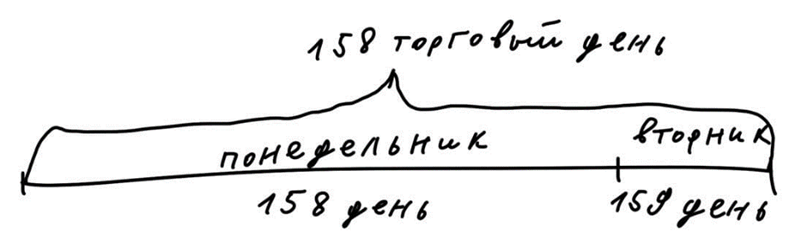

In [14]:
data["trade_dayofyear"] = data["dayofyear"]
data.loc[data.hour.isin([0, 1]), "trade_dayofyear"] = None
data["trade_dayofyear"] = data["trade_dayofyear"].fillna(method="ffill")
data

,time,c,h,l,o,year,month,day,hour,minute,second,dayofyear,weekofyear,dayofweek,trade_dayofyear
0,2021-06-07 07:00:00,596.34,597.88,593.14,596.13,2021,6,7,7,0,0,158,23,0,158.0
1,2021-06-07 07:01:00,597.00,597.89,596.35,597.87,2021,6,7,7,1,0,158,23,0,158.0
2,2021-06-07 07:02:00,596.89,597.56,596.50,597.42,2021,6,7,7,2,0,158,23,0,158.0
3,2021-06-07 07:03:00,595.87,596.70,594.24,596.35,2021,6,7,7,3,0,158,23,0,158.0
4,2021-06-07 07:04:00,595.27,596.00,594.34,595.88,2021,6,7,7,4,0,158,23,0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40398,2021-07-24 01:36:00,643.80,643.80,643.80,643.80,2021,7,24,1,36,0,205,29,5,204.0
40399,2021-07-24 01:37:00,643.80,643.80,643.80,643.80,2021,7,24,1,37,0,205,29,5,204.0
40400,2021-07-24 01:39:00,643.80,643.80,643.80,643.80,2021,7,24,1,39,0,205,29,5,204.0
40401,2021-07-24 01:40:00,643.75,643.80,643.75,643.80,2021,7,24,1,40,0,205,29,5,204.0


In [15]:
data = data.set_index("time")

In [16]:
data.loc["2021-06-07":"2021-06-09"]

,c,h,l,o,year,month,day,hour,minute,second,dayofyear,weekofyear,dayofweek,trade_dayofyear
time,,,,,,,,,,,,,,
2021-06-07 07:00:00,596.34,597.88,593.14,596.13,2021,6,7,7,0,0,158,23,0,158.0
2021-06-07 07:01:00,597.00,597.89,596.35,597.87,2021,6,7,7,1,0,158,23,0,158.0
2021-06-07 07:02:00,596.89,597.56,596.50,597.42,2021,6,7,7,2,0,158,23,0,158.0
2021-06-07 07:03:00,595.87,596.70,594.24,596.35,2021,6,7,7,3,0,158,23,0,158.0
2021-06-07 07:04:00,595.27,596.00,594.34,595.88,2021,6,7,7,4,0,158,23,0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-09 23:55:00,598.40,598.40,598.20,598.20,2021,6,9,23,55,0,160,23,2,160.0
2021-06-09 23:56:00,598.30,598.40,598.29,598.29,2021,6,9,23,56,0,160,23,2,160.0
2021-06-09 23:57:00,598.24,598.40,598.23,598.40,2021,6,9,23,57,0,160,23,2,160.0


In [17]:
data.loc["2021-07-01":]

,c,h,l,o,year,month,day,hour,minute,second,dayofyear,weekofyear,dayofweek,trade_dayofyear
time,,,,,,,,,,,,,,
2021-07-01 00:00:00,679.41,679.41,679.36,679.41,2021,7,1,0,0,0,182,26,3,181.0
2021-07-01 00:00:00,679.41,679.41,679.36,679.41,2021,7,1,0,0,0,182,26,3,181.0
2021-07-01 00:01:00,679.32,679.32,679.32,679.32,2021,7,1,0,1,0,182,26,3,181.0
2021-07-01 00:01:00,679.32,679.32,679.32,679.32,2021,7,1,0,1,0,182,26,3,181.0
2021-07-01 00:02:00,679.52,679.52,679.52,679.52,2021,7,1,0,2,0,182,26,3,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-24 01:36:00,643.80,643.80,643.80,643.80,2021,7,24,1,36,0,205,29,5,204.0
2021-07-24 01:37:00,643.80,643.80,643.80,643.80,2021,7,24,1,37,0,205,29,5,204.0
2021-07-24 01:39:00,643.80,643.80,643.80,643.80,2021,7,24,1,39,0,205,29,5,204.0


In [18]:
data.between_time("7:00:00", "10:00:00")

,c,h,l,o,year,month,day,hour,minute,second,dayofyear,weekofyear,dayofweek,trade_dayofyear
time,,,,,,,,,,,,,,
2021-06-07 07:00:00,596.34,597.88,593.14,596.13,2021,6,7,7,0,0,158,23,0,158.0
2021-06-07 07:01:00,597.00,597.89,596.35,597.87,2021,6,7,7,1,0,158,23,0,158.0
2021-06-07 07:02:00,596.89,597.56,596.50,597.42,2021,6,7,7,2,0,158,23,0,158.0
2021-06-07 07:03:00,595.87,596.70,594.24,596.35,2021,6,7,7,3,0,158,23,0,158.0
2021-06-07 07:04:00,595.27,596.00,594.34,595.88,2021,6,7,7,4,0,158,23,0,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-23 09:39:00,651.30,651.30,651.30,651.30,2021,7,23,9,39,0,204,29,4,204.0
2021-07-23 09:44:00,651.30,651.30,651.30,651.30,2021,7,23,9,44,0,204,29,4,204.0
2021-07-23 09:49:00,650.87,650.87,650.87,650.87,2021,7,23,9,49,0,204,29,4,204.0


Пример расчёта дневных свечей

In [19]:
data.groupby("trade_dayofyear").agg({"o": "first", "h": "max", "l": "min", "c": "last"})

,o,h,l,c
trade_dayofyear,,,,
158.0,596.13,608.11,582.88,601.20
159.0,603.00,627.20,595.50,601.89
160.0,606.66,611.75,597.02,598.00
161.0,599.90,616.40,591.95,612.96
162.0,607.00,615.92,601.49,609.03
165.0,610.68,625.47,609.10,616.50
166.0,617.61,621.29,597.94,598.27
167.0,600.49,608.50,593.01,602.65
168.0,605.64,621.44,598.00,615.82
